#Business Understanding
---

Zen Company is a distributor and retail company engaged in buying and selling laptops that want to predict the price of laptops. To make a profit, the Zen company builds a model that can predict the price of laptops using predictive modeling techniques, in addition to making price predictions, Zen company also conducts market analysis of laptop brands that are selling well in the market, and specifications of laptops that are selling well in the market.

# Problem Statements dan Goals
---

* What laptop brands are selling well in the market?
* How is the price distribution of each laptop brand?
* What are the specifications of the best-selling laptops on the market?
* How much does a laptop with certain specifications cost?
* From the set of features, which features the most affect the price of a laptop?

#Methodology
---

Laptop price prediction is a goal to be achieved. As we know, price is a continuous variable. In predictive analytics, so the problem will be solved using a regression model. Therefore, the methodology in this project is: build a regression model with laptop prices as the target

# Metric
---

Metrics are used to evaluate how well the built model predicts prices. For the case of regression, some commonly used metrics are Mean Squared Error (MSE) or Root Mean Square Error (RMSE) and R square. In general, this metric measures how far the predicted result is from the true value. We'll go into more detail about these metrics in the Evaluation module.

The model development will use several machine learning algorithms, namely Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and XGBoost. From the five models, one model will be chosen which has the smallest prediction error value. In other words, we will make the model as accurate as possible, that is, the model with the smallest possible error value with the largest possible R square.

# Solution
---

Build a model using XGBoost with an accuracy of 90.29%

# Data Dictionary
1 Company- String -Laptop Manufacturer <br>
2 Product -String -Brand and Model/Company <br>
3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.) <br>
4 Inches -Numeric- Screen Size <br>
5 ScreenResolution -String- Screen Resolution <br>
6 Cpu- String -Central Processing Unit (CPU) <br>
7 Ram -String- Laptop RAM <br>
8 Memory -String- Hard Disk / SSD Memory <br>
9 GPU -String- Graphics Processing Units (GPU) <br>
10 OpSys -String- Operating System <br>
11 Weight -String- Laptop Weight <br>
12 Price_euros -Numeric- Price (Euro) <br>

In [ ]:
#manipluation data frame
import pandas as pd
import numpy as np

#for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

#for ignore warning massage
import warnings
warnings.filterwarnings("ignore")

#for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score




# Load Dataset

In [ ]:
laptop = pd.read_csv('/content/drive/MyDrive/Project Akhir Dibimbing/laptop_price.csv', encoding='latin-1')

#Exploration Data Analysis

In [ ]:
#check 5 first of row
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
#check 5 last of row
laptop.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [ ]:
#random 5 sample
laptop.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
597,604,Lenovo,Thinkpad T470p,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Intel HD Graphics 630,Windows 10,1.7kg,1474.0
18,19,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,499.0
856,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.0
17,18,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,2858.0
107,110,Asus,UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.3kg,1193.0


In [ ]:
#check info dataset and missing value
print('Dataset Information every columns')
laptop.info()

print('----'*10)

print('check for missing value in dataset')
laptop.isnull().sum()

Dataset Information every columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
----------------------------------------
check for missing value in dataset


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

1.Data types for every column have matched, and for every columns not have missing values. <br>
2.for column weight will convert to integer for analysist the data

In [ ]:
#check duplicate of dataset
laptop[laptop.duplicated()]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


there is not have duplicated data

In [ ]:
#check statistics for column numeric
laptop.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Based on desriptive analysis:
1. laptop_ID is not unique column, but it can't driven much information. <br>
2. mean of Inches is ~15 and range in this columns is 10-18 inches. <br>
3. mean prices is ~1123 euros, and range price is 174 - 6099. <br>

for numerical columns the predictor is Inches and the target is Price_euros.

In [ ]:
#check statistic for categorical columns
laptop.describe(include='object')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


From statistics, the most sold brand is the Lenovo brand, with the type of laptop being a notebook with a screen resolution of FULL HD 1920x1080 with an operating system in the form of Windows 10 and a CPU in the form of Intel Core i5 with 8 GB of RAM and 256 SSD memory storage. <br>

It makes sense that the laptop market today has many consumers who are eyeing a laptop with a minimum specification of i5 with 8 GB of ram for various purposes.





In [ ]:
#checking unique and value counts each column
for col in laptop.columns:
  print("==="*50)
  print('Unique and value counts {}\n{}'.format(col,laptop[col].value_counts()))

Unique and value counts laptop_ID
1320    1
453     1
435     1
436     1
437     1
       ..
880     1
881     1
882     1
883     1
1       1
Name: laptop_ID, Length: 1303, dtype: int64
Unique and value counts Company
Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
Unique and value counts Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Vostro 3568                                19
Legion Y520-15IKBN                         19
                                           ..
IdeaPad 520s-14IKB                          1
TP501UA-CJ131T (i5-7200U/8GB/1TB/W10)       1
IdeaPad Y700-15ACZ           

1.Some of the brand names that have been sold and listed are: <br>
Apple HP Acer Asus Dell Lenovo Chuwi MSI,Microsoft,Toshiba,Huawei,Xiaomi,Vero,Razer,Mediacom,Samsung,Google,Fujitsu,LG. <br>

2.Some types of laptops sold and listed are: <br> 
Ultrabook,Notebook,Netbook,Gaming,2 in 1 Convertible,Workstation

3.Some operating system of laptops sold and listed are: <br>
macOS,No OS,Windows 10,Mac OS X,Linux,Android,Windows 10 S,Chrome OS,Windows 7

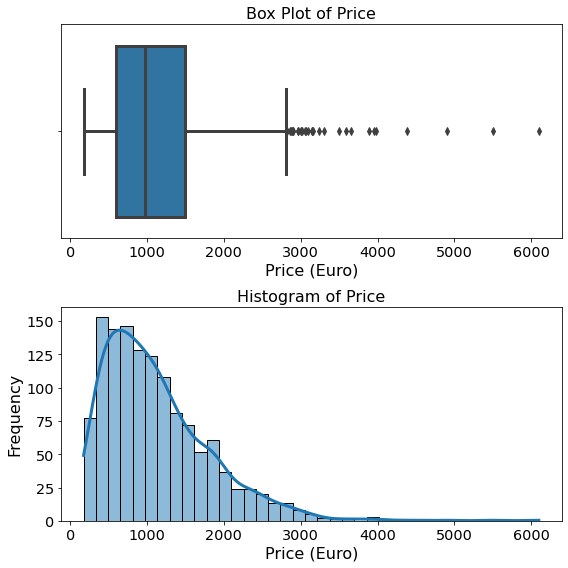

In [ ]:
plt.figure(figsize=(8, 8))

#box plot price
plt.subplot(2,1,1)
sns.boxplot(data=laptop,x='Price_euros')
plt.title('Box Plot of Price', fontsize=16)
plt.xlabel('Price (Euro)', fontsize=16)

#histogram price
plt.subplot(2,1,2)
sns.histplot(data=laptop,x='Price_euros',kde=True)
plt.title('Histogram of Price',fontsize=16)
plt.xlabel('Price (Euro)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
#Outliers Remove
#Q1 = laptop['Price_euros'].quantile(.25)
#Q3 = laptop['Price_euros'].quantile(.75)
#IQR = Q3-Q1
#upper_limit = Q3+1.5*Q3


#laptop=laptop[laptop['Price_euros']<upper_limit]

not much impact to the prediction model when the outliers remove, so the outliers will maintain

1.Normal price range is at 500 to 1500 <br>
2.The price distribution is left skewed and there are outliers

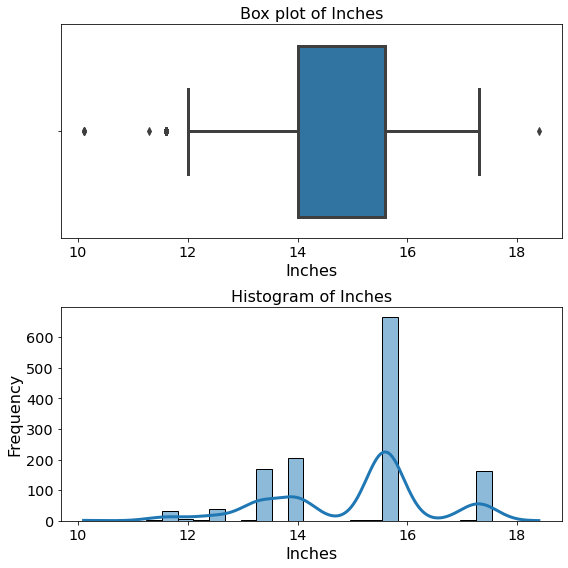

In [ ]:
plt.figure(figsize=(8, 8))

#box plot price
plt.subplot(2,1,1)
sns.boxplot(data=laptop,x='Inches')
plt.title('Box plot of Inches',fontsize=16)
plt.xlabel('Inches',fontsize=16)

#histogram Inches
plt.subplot(2,1,2)
sns.histplot(data=laptop,x='Inches',kde=True)
plt.title('Histogram of Inches',fontsize=16)
plt.xlabel('Inches', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.tight_layout()
plt.show()

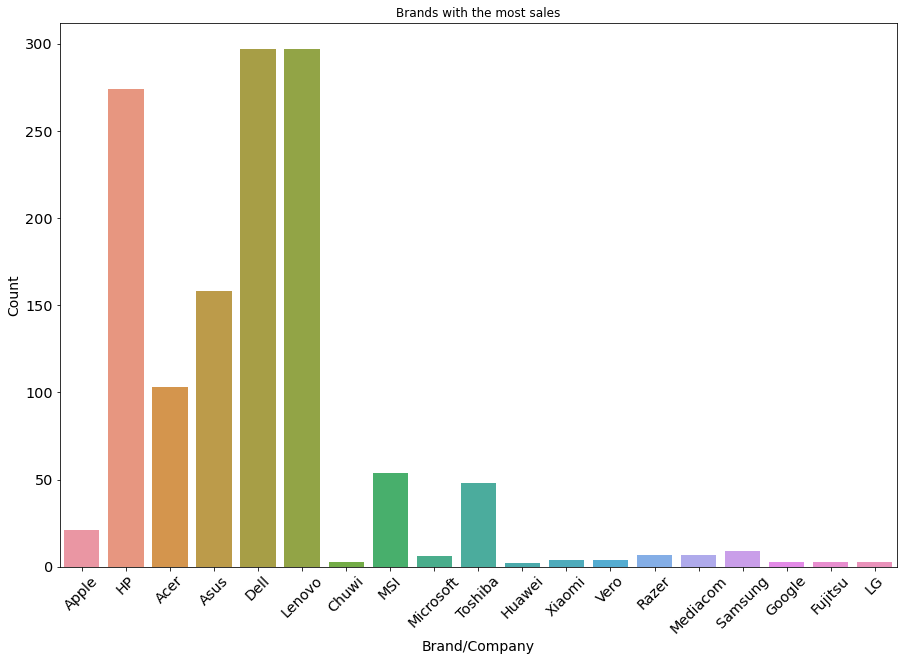

In [ ]:
#count plot of Brand name  to see what brands are selling the most
plt.figure(figsize=(15, 10))
sns.countplot(laptop['Company'])
plt.title('Brands with the most sales')
plt.xticks(rotation=45)
plt.xlabel('Brand/Company',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

Brands that are very much sold in the market are the Dell and Lenovo brands, followed by HP, Asus and Acer brands

[Text(0, 0, 'macOS'),
 Text(0, 0, 'No OS'),
 Text(0, 0, 'Windows 10'),
 Text(0, 0, 'Mac OS X'),
 Text(0, 0, 'Linux'),
 Text(0, 0, 'Android'),
 Text(0, 0, 'Windows 10 S'),
 Text(0, 0, 'Chrome OS'),
 Text(0, 0, 'Windows 7')]

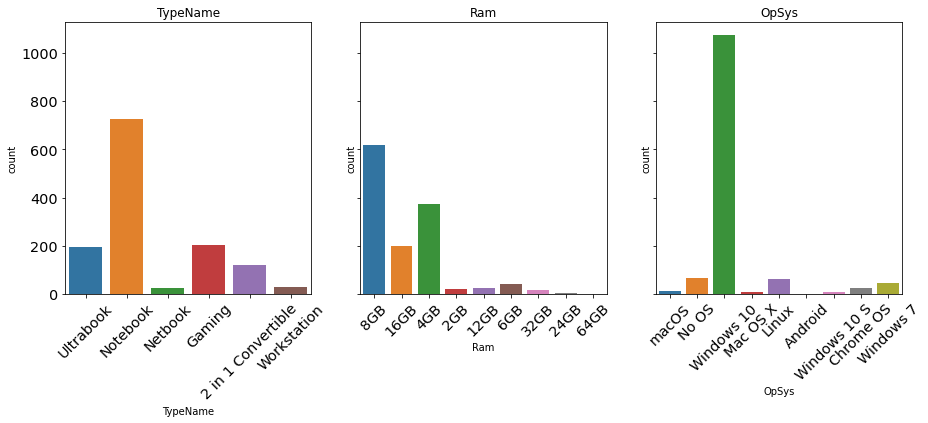

In [ ]:
#making count plot for type name,ram and operating system to see the distribution

#set figure size
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Type Name
sns.countplot(ax=axes[0], x=laptop['TypeName'])
axes[0].set_title(laptop['TypeName'].name)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
# Ram
sns.countplot(ax=axes[1], x=laptop['Ram'])
axes[1].set_title(laptop['Ram'].name)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

# OpSys
sns.countplot(ax=axes[2], x=laptop['OpSys'])
axes[2].set_title(laptop['OpSys'].name)
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

* Notebook is very popular than the others <br>
* Laptops with 8GB of ram sold very well, followed by laptops with 4GB of ram, and also the Windows 10 operating system sold very well. <br>
* The current market situation is very much looking for ram with 8GB and the Windows 10 operating system, this can be indicated that a laptop with a comfortable type for carrying out daily activities related to using a laptop and Windows 10 is an operating system that is quite difficult to get viruses, so laptops with this type of it is quite ideal to be a consumer choice



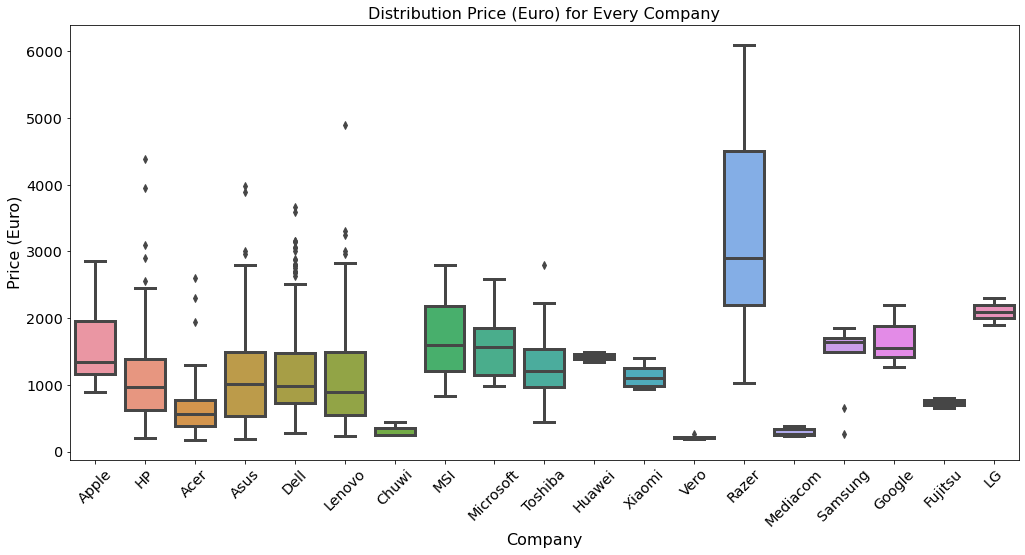

In [ ]:
#looking for distribution price for every company
plt.rcParams['figure.figsize']=(17,8)
sns.boxplot(data=laptop,x='Company',y='Price_euros')
plt.title('Distribution Price (Euro) for Every Company', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Company', fontsize=16)
plt.ylabel('Price (Euro)', fontsize=16)
plt.show()

1. Based on the price range, for brands such as Acer, HP, Asus, Dell, and Lenovo, which the most sales, the price is quite cheap so consumers are more likely to buy these brands.
2. For the Apple brand, the price is quite expensive, so only certain people buy the brand.
3. For the Razer Brand, the price is quite high so that consumers are less interested in buying the product when compared to the Apple brand.
4. For brands such as Chuwi, Vero, Mediacom, and Fujitsu, charge very cheap prices but there is a lack of consumer interest in buying laptops from these brands, this could be due to a lack of consumer knowledge of these brands.
5. For other well-known brands such as Samsung, Google, and LG, the price range is relatively the same as brands such as Toshiba and MSI, but these brands are less competitive in sales than MSI and LG brands, and can also be seen from the sales charts of Samsung, Google, and LG. lost to Microsoft.

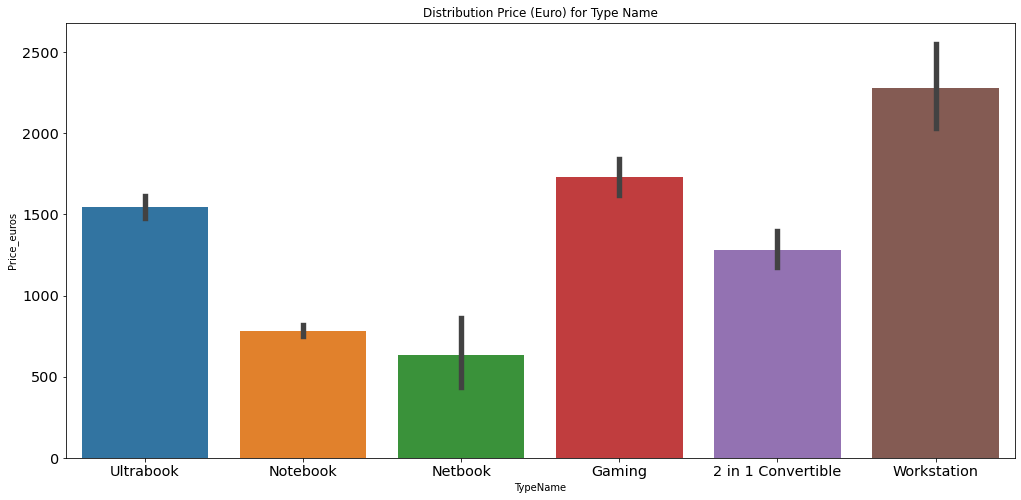

In [ ]:
#distribution price for type Name
plt.rcParams['figure.figsize']=(17,8)
sns.barplot(data=laptop,x=laptop['TypeName'],y='Price_euros')
plt.title('Distribution Price (Euro) for Type Name')
plt.show()

* Netbook has lower prices than the others. <br>
* Notebooks have a fairly cheap price, and are relatively the same as Netbooks, and Notebooks have better efficiency than netbooks, so customers prefer notebooks to buy, it makes sense that notebooks have a high sales rate. <br>
* Workstations have a higher price than others, so the demand for workstations is not so much this can be seen from the sales chart <br>

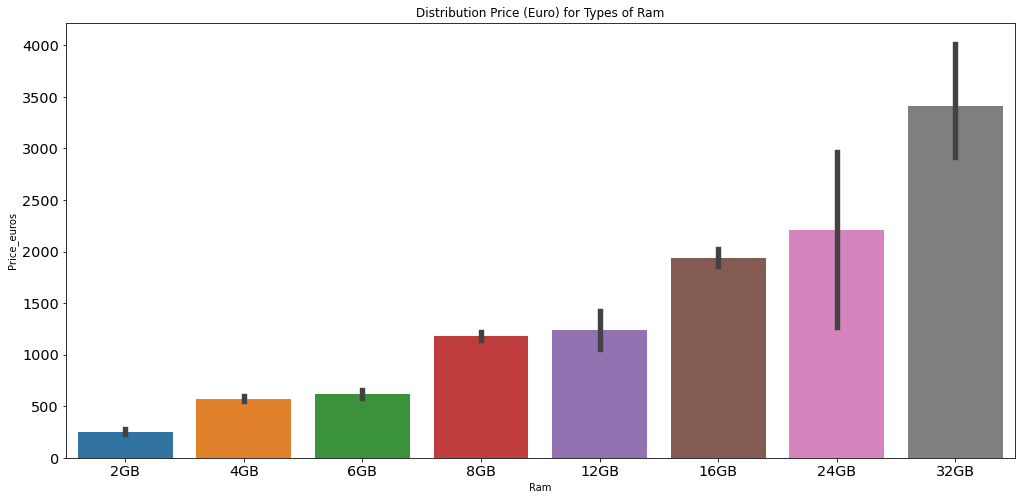

In [ ]:
#distribution price for every types of Ram
plt.rcParams['figure.figsize']=(17,8)
sns.barplot(data=laptop,x=laptop['Ram'],y='Price_euros',order=['2GB', '4GB','6GB','8GB','12GB','16GB','24GB','32GB'])
plt.title('Distribution Price (Euro) for Types of Ram')
plt.show()

1.The higher the ram of a laptop, the price will tend to increase. <br>
2.```Ram``` is good predictor for predict price of laptop

#Data Cleaning + Feature Engineering + EDA

### Cleaning GB and KG

In [ ]:
#Remove Laptop ID
laptop = laptop.drop('laptop_ID',axis=1)

#remove GB in ram
laptop['Ram'] = laptop['Ram'].str.replace('GB',"")
#convert to a float
laptop['Ram'] =laptop['Ram'].astype('float')
#remove KG in weight
laptop['Weight'] = laptop['Weight'].str.replace('kg','')
#convert to a float
laptop['Weight'] = laptop['Weight'].astype('float')
#see result
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


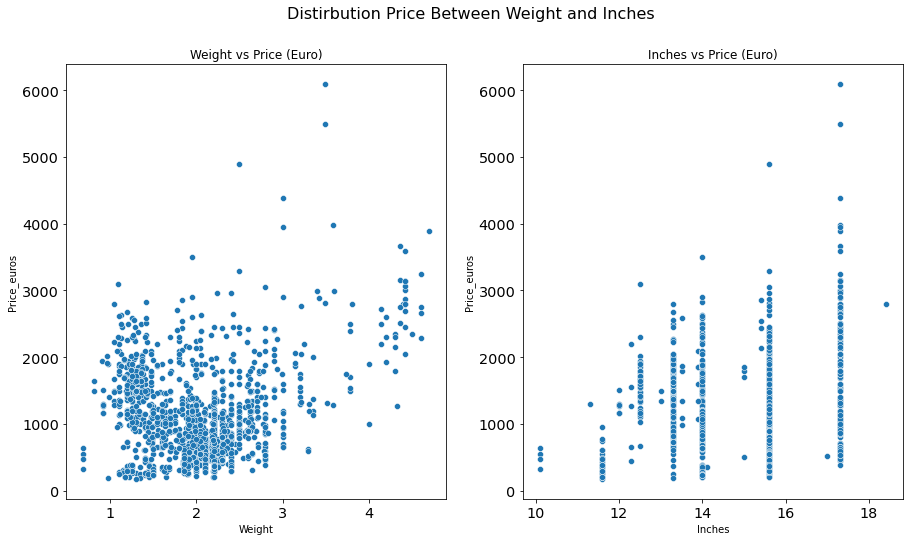

In [ ]:
#distirbution price weight and Inches
plt.rcParams['figure.figsize'] = (15,8)

#setting title
fig = plt.figure()
fig.suptitle("Distirbution Price Between Weight and Inches", fontsize=16)

#create scatter plot weigth vs price
plt.subplot(121)
sns.scatterplot(data=laptop,x='Weight',y='Price_euros')
plt.title('Weight vs Price (Euro)')

#create scatter plot Inches vs price
plt.subplot(122)
sns.scatterplot(data=laptop,x='Inches',y='Price_euros')
plt.title('Inches vs Price (Euro)')
plt.show()

there are influence of weight and inches on the price

### Extrack Touchscreen, IPS and 4K Ultra HD

In [ ]:
#from unique values especially for ScreenResolution we can get a new feature such as touchscreen, IPS and 4K Ultra HD
#if touchsreen return 1, else 0

laptop['TouchScreen'] = laptop['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


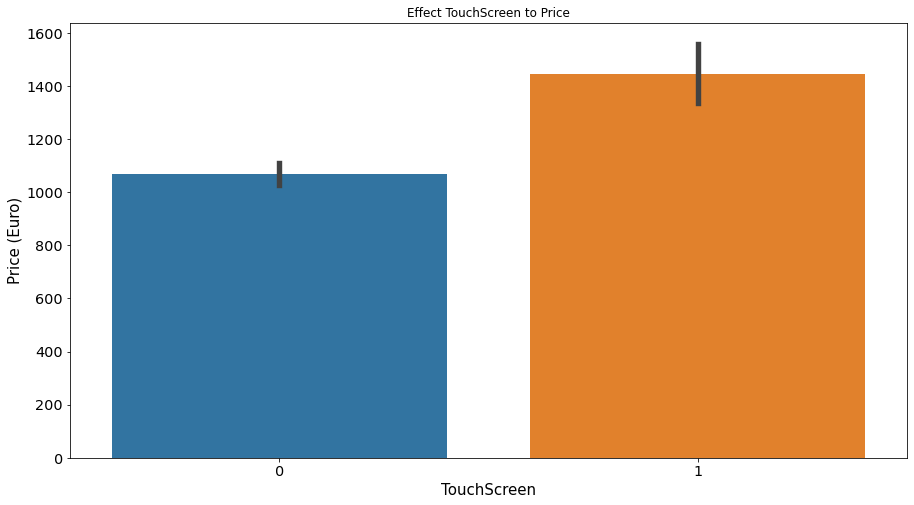

In [ ]:
#effect touchscreen to price
sns.barplot(data=laptop,x='TouchScreen',y='Price_euros')
plt.title('Effect TouchScreen to Price')
plt.xlabel('TouchScreen', fontsize=15)
plt.ylabel('Price (Euro)', fontsize=15)
plt.show()

* Laptops that have a ```touchscreen``` have a high price compared to laptops that don't have a ```touchscreen```

In [ ]:
#if IPS in screen true return 1, else 0
laptop['IPS'] = laptop['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


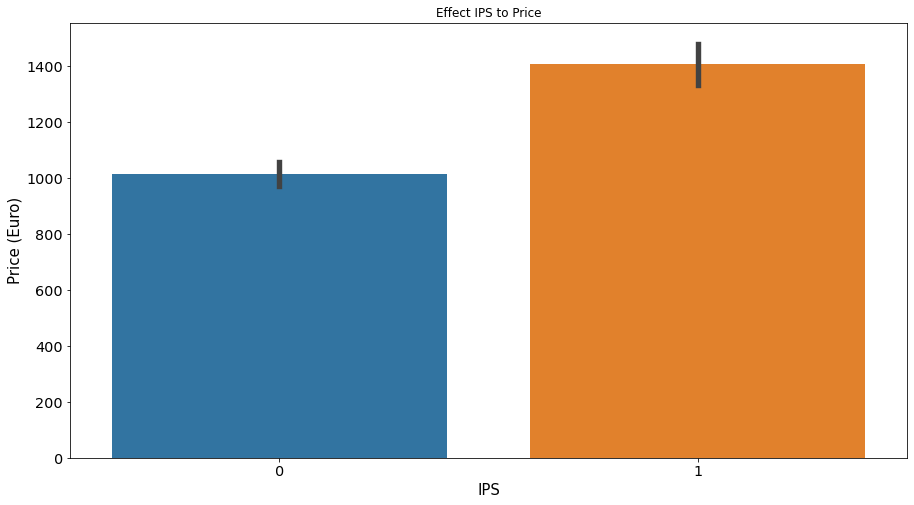

In [ ]:
#effect IPS to price
sns.barplot(data=laptop,x='IPS',y='Price_euros')
plt.title('Effect IPS to Price')
plt.xlabel('IPS', fontsize=15)
plt.ylabel('Price (Euro)', fontsize=15)
plt.show()

* Laptops that have a ```IPS``` have a high price compared to laptops that don't have a ```IPS```

In [ ]:
#if 4K Ultra HD in screen true return 1, else 0
laptop['4K'] = laptop['ScreenResolution'].apply(lambda x: 1 if '4K Ultra HD' in x else 0)
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0


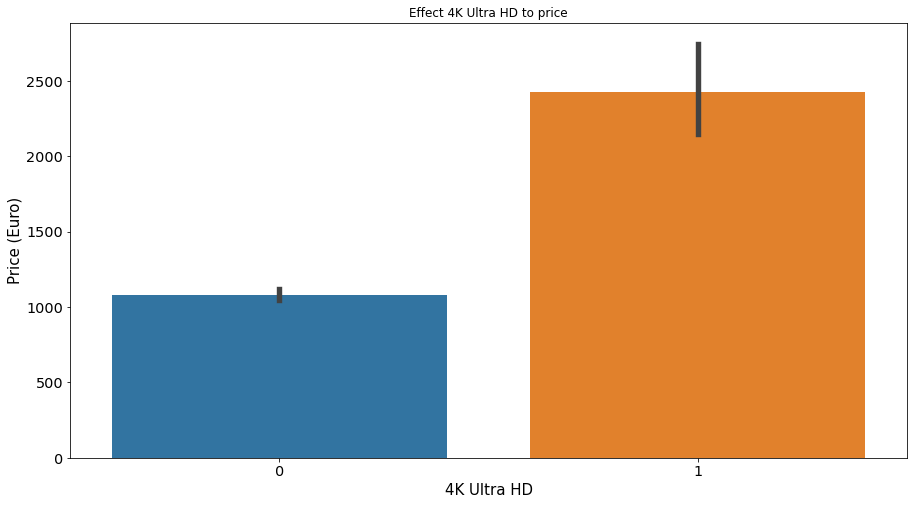

In [ ]:
#effect 4K Ultra HD to price
sns.barplot(data=laptop,x='4K',y='Price_euros')
plt.title('Effect 4K Ultra HD to price')
plt.xlabel('4K Ultra HD', fontsize=15)
plt.ylabel('Price (Euro)', fontsize=15)
plt.show()

* Laptops that have a ```4K Ultra HD``` have a high price compared to laptops that don't have a ```4K Ultra HD```

### Extract X and Y Resolution

In [ ]:
#split() method to distinguish X dan Y resolution by x 
split_res = laptop['ScreenResolution'].str.split('x',n=1,expand=True)

#get X resolution
laptop['X_res'] = split_res[0]
#get X resolution from text
laptop['X_res']= laptop['X_res'].str.replace(",",'').str.findall(r'\d+\.?\d+').apply(lambda x : x[0])
#convert X_res to integer
laptop['X_res']= laptop['X_res'].astype('int')

#get Y resolution
laptop['Y_res'] = split_res[1]
#convert Y_res to integer
laptop['Y_res'] = laptop['Y_res'].astype('int')
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,2560,1600


### Pixel Per Inch (PPI)

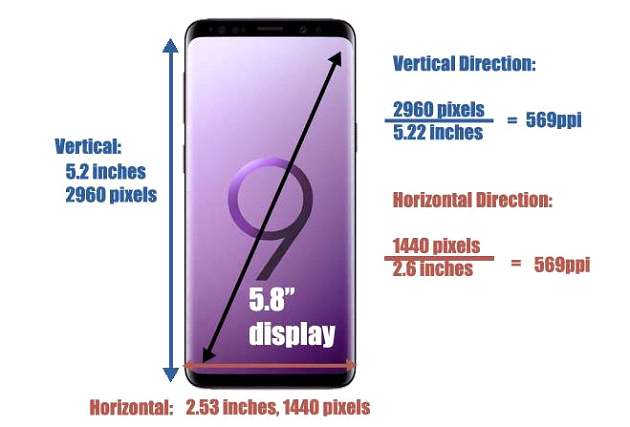

“Pixels per square inch” is a much better way to explain image quality. When the PPI increases, the “pixels per square inch” will quadruple

$ PPI = \frac{((Xres)^2 + (Yres)^2)^{1/2}}{Incehs} $

In [ ]:
#calculate PPI
laptop['PPI'] = round((((laptop['X_res']**2+laptop['Y_res']**2))**0.5/laptop['Inches']),2)
laptop['PPI']

0       226.98
1       127.68
2       141.21
3       220.53
4       226.98
         ...  
1298    157.35
1299    276.05
1300    111.94
1301    100.45
1302    100.45
Name: PPI, Length: 1303, dtype: float64

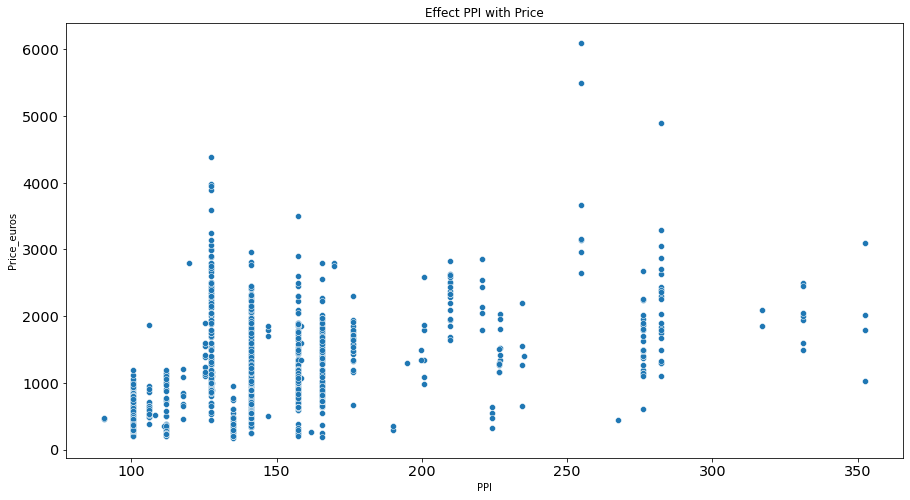

In [ ]:
#effect PPi with Price
sns.scatterplot(data=laptop,x='PPI',y='Price_euros')
plt.title('Effect PPI with Price')
plt.show()

the effect of PPi is not so significant, it can be seen from the distribution of the scatter plot, when PPI > 100 the price tends to be unstable

### Extract CPU

Most common processors are made by intel,so i will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole

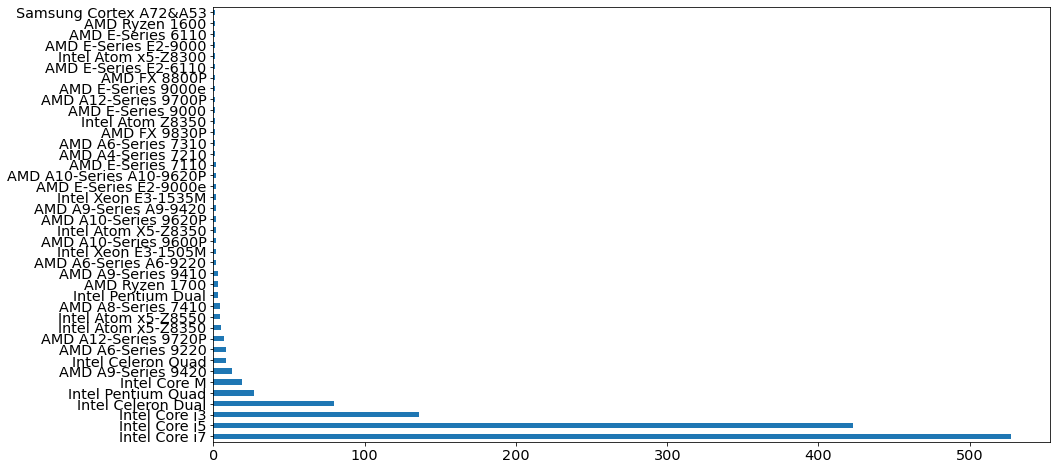

In [ ]:
#extract CPU to get Intel and AMD processor
laptop['Cpu_type']=laptop['Cpu'].apply(lambda x:" ".join(x.split()[:3]))
laptop['Cpu_type'].value_counts().plot(kind='barh')

laptops using intel i7 as a processor are the most sold laptops compared to other CPU types

In [ ]:
#make a function to cluster be Intel,AMD and other

def processorstype(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

#run function to extract the text
laptop['processor'] = laptop['Cpu_type'].apply(lambda text:processorstype(text))

#drop columns Cpu and Cpu type because don't using it
laptop = laptop.drop(['Cpu','Cpu_type'],axis=1)

laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440,900,127.68,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920,1080,141.21,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,2880,1800,220.53,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,2560,1600,226.98,Intel Core i5


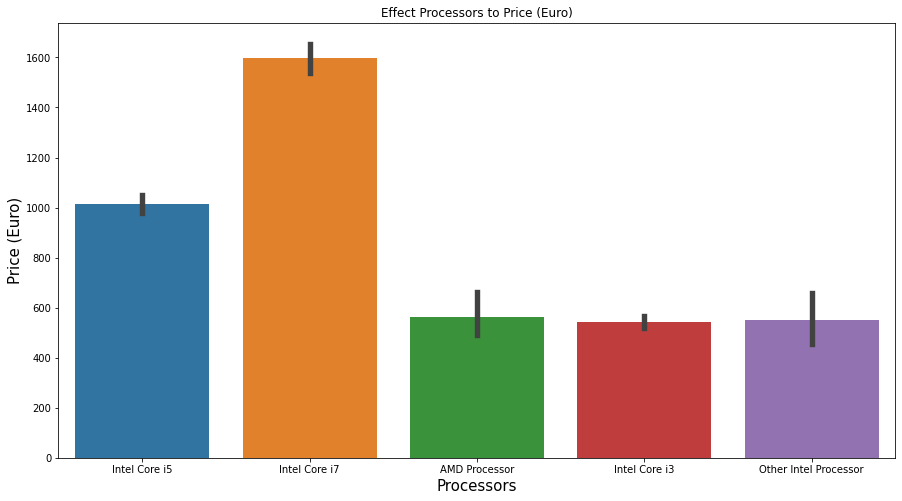

In [ ]:
#look at for effect the processors to price
sns.barplot(data=laptop,x='processor',y='Price_euros')
plt.title('Effect Processors to Price (Euro)')
plt.xlabel('Processors',fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Price (Euro)',fontsize=15)
plt.yticks(fontsize=10)
plt.show()

for an intel processor, the higher the type of processor used by a laptop, the higher the price, but for the AMD processor, other intel processors have relatively the same price as the Intel Core i3

### Extract Memory

Separate the memory to see affect of the memory to laptops price

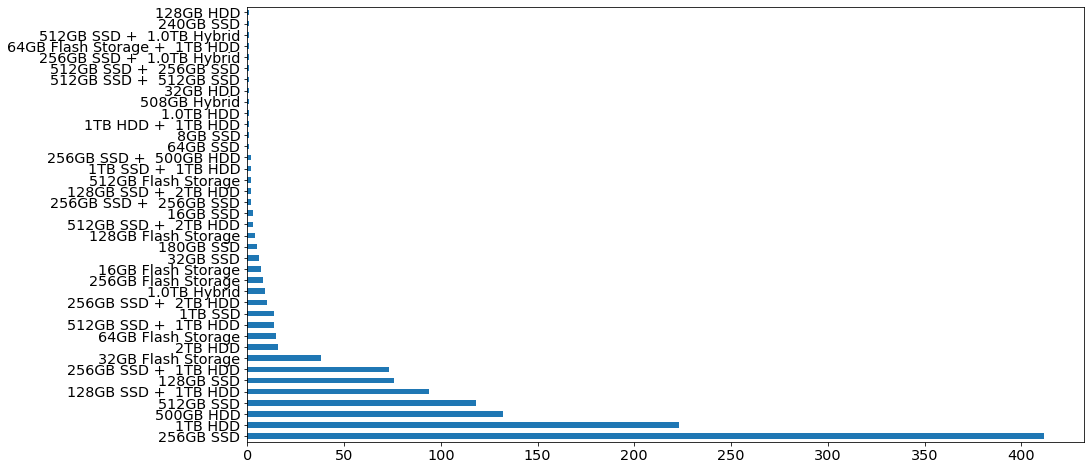

In [ ]:
#see the types of memory types that have sold the most
laptop['Memory'].value_counts().plot(kind='barh')

1.laptops that use memory type 256 SSD are the best-selling, followed by memory type 1 TB HDD.<br>
2.There are two types of laptops sold in the market, namely laptops with only a memory layer and the second is a laptop with two memory layers such as a combination of SSD + HDD or a combination of SSD + Hybrid.

In [ ]:
laptop['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                           1
8

In [ ]:
#remove decimal such as 1.0 to 1
laptop['Memory'] = laptop['Memory'].str.replace('\.0','',regex=True)

#convert TB to 000, because as we know 1TB = 1000 GB
laptop['Memory']=laptop['Memory'].str.replace('TB','000',regex=True)

#remove GB
laptop['Memory']=laptop['Memory'].str.replace('GB','',regex=True)

#split by "+" to distinguish the layers of memory and save to a new variable
Memory=laptop['Memory'].str.split('+',n=1,expand=True)

Memory

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [ ]:
#input the memory into mainly data frame
laptop['first'] = Memory[0]

#remove the white space
laptop['first'] =laptop['first'].str.strip()

laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,first
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5,128 SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920,1080,141.21,Intel Core i5,256 SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,2880,1800,220.53,Intel Core i7,512 SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,2560,1600,226.98,Intel Core i5,256 SSD


In [ ]:
#make a function to return value like if layer 1 is SSD so will return 1, else 0. etc
def layer(value):
    
    laptop['Layer1'+value] = laptop['first'].apply(lambda x:1 if value in x else 0)
    

#making list for HDD,SDD,Hybrid and FlashStorage and using looping   
listtoapply = ['HDD','SSD','Hybrid','Flash Storage']    
for value in listtoapply:
    layer(value)
    
    
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920,1080,141.21,Intel Core i5,256 SSD,0,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,2880,1800,220.53,Intel Core i7,512 SSD,0,1,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,2560,1600,226.98,Intel Core i5,256 SSD,0,1,0,0


In [ ]:
#just keep the number and remove the character on column first
laptop['first'] = laptop['first'].str.replace(r'\D','')

#convert columns first to be intger
laptop['first'] = laptop['first'].astype('int')
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   Product              1303 non-null   object 
 2   TypeName             1303 non-null   object 
 3   Inches               1303 non-null   float64
 4   ScreenResolution     1303 non-null   object 
 5   Ram                  1303 non-null   float64
 6   Memory               1303 non-null   object 
 7   Gpu                  1303 non-null   object 
 8   OpSys                1303 non-null   object 
 9   Weight               1303 non-null   float64
 10  Price_euros          1303 non-null   float64
 11  TouchScreen          1303 non-null   int64  
 12  IPS                  1303 non-null   int64  
 13  4K                   1303 non-null   int64  
 14  X_res                1303 non-null   int64  
 15  Y_res                1303 non-null   i

In [ ]:
# second layer

laptop['second'] = Memory[1]

laptop['second'] =laptop['second'].str.strip()


In [ ]:
#make a function 
def Layer2(value):
    
    laptop['Layer2'+value] = laptop['second'].apply(lambda x:1 if value in x else 0)
    

#making list for HDD,SDD,Hybrid and FlashStorage and using looping   
listtoapply = ['HDD','SSD','Hybrid','Flash Storage']
laptop['second'] = laptop['second'].fillna("0")    
for value in listtoapply:
    Layer2(value)
    
#just keep the number and remove the character on column second
laptop['second'] = laptop['second'].str.replace(r'\D','')

#convert columns second to be integer
laptop['second'] = laptop['second'].astype('int')
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   Product              1303 non-null   object 
 2   TypeName             1303 non-null   object 
 3   Inches               1303 non-null   float64
 4   ScreenResolution     1303 non-null   object 
 5   Ram                  1303 non-null   float64
 6   Memory               1303 non-null   object 
 7   Gpu                  1303 non-null   object 
 8   OpSys                1303 non-null   object 
 9   Weight               1303 non-null   float64
 10  Price_euros          1303 non-null   float64
 11  TouchScreen          1303 non-null   int64  
 12  IPS                  1303 non-null   int64  
 13  4K                   1303 non-null   int64  
 14  X_res                1303 non-null   int64  
 15  Y_res                1303 non-null   i

In [ ]:
laptop['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [ ]:
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5,128,0,1,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440,900,127.68,Intel Core i5,128,0,0,0,1,0,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920,1080,141.21,Intel Core i5,256,0,1,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,2880,1800,220.53,Intel Core i7,512,0,1,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,2560,1600,226.98,Intel Core i5,256,0,1,0,0,0,0,0,0,0


In [ ]:
#make combine the layer 1 dan layer 2 to make total storage like HDD total.etc

#HDD
laptop['HDD'] =(laptop['first']*laptop['Layer1HDD']) + (laptop['second']*laptop['Layer2HDD'])

#SDD
laptop['SDD'] = (laptop['first']*laptop['Layer1SSD']) + (laptop['second']*laptop['Layer2SSD'])

#flashstorage
laptop['Flash Storage'] = (laptop['first']*laptop['Layer1Flash Storage']) + (laptop['second']*laptop['Layer2Flash Storage'])

#Hybrid
laptop['Hybrid'] = (laptop['first']*laptop['Layer1Hybrid']) + (laptop['second']*laptop['Layer2Hybrid'])



In [ ]:
## dropping of uncessary columns
laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash Storage'],inplace=True)

laptop.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,HDD,SDD,Flash Storage,Hybrid
986,HP,Probook 450,Notebook,15.6,Full HD 1920x1080,8.0,1000 HDD,Intel HD Graphics 620,Windows 10,2.04,806.00,0,0,0,1920,1080,141.21,Intel Core i5,1000,0,0,0
951,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,Windows 10,1.36,1775.00,0,0,0,1920,1080,157.35,Intel Core i7,0,256,0,0
336,Dell,Inspiron 7570,Ultrabook,15.6,IPS Panel Full HD 1920x1080,8.0,128 SSD + 1000 HDD,Nvidia GeForce 940MX,Windows 10,1.90,1049.00,0,1,0,1920,1080,141.21,Intel Core i5,1000,128,0,0
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5,0,128,0,0
1078,Lenovo,V110-15ISK (i5-6200U/4GB/500GB/W10),Notebook,15.6,1366x768,4.0,500 HDD,Intel HD Graphics 520,Windows 10,2.10,540.00,0,0,0,1366,768,100.45,Intel Core i5,500,0,0,0


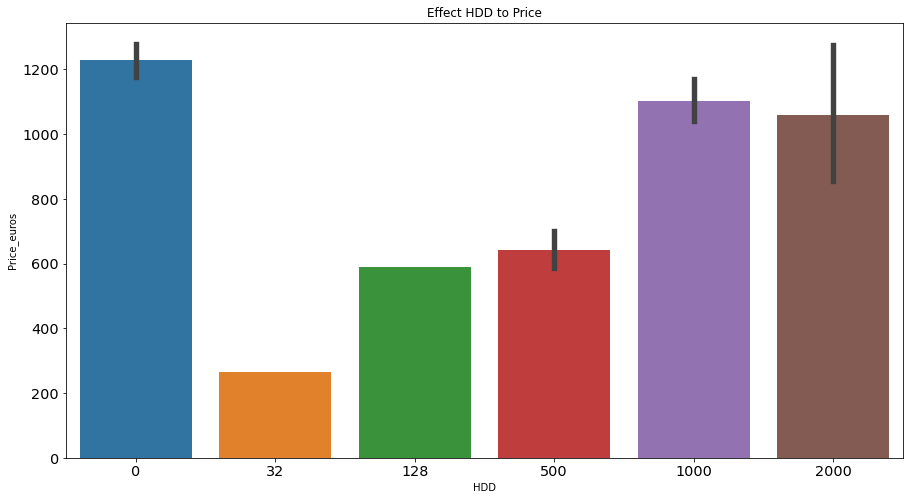

In [ ]:
#analysis effect storage with price
sns.barplot(laptop.HDD,laptop.Price_euros)
plt.title('Effect HDD to Price')
plt.show()

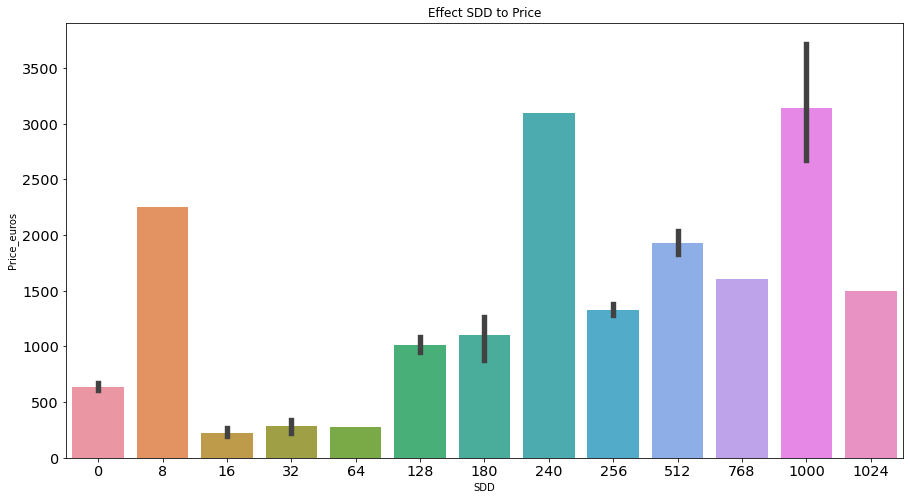

In [ ]:
sns.barplot(laptop.SDD,laptop.Price_euros)
plt.title('Effect SDD to Price')
plt.show()

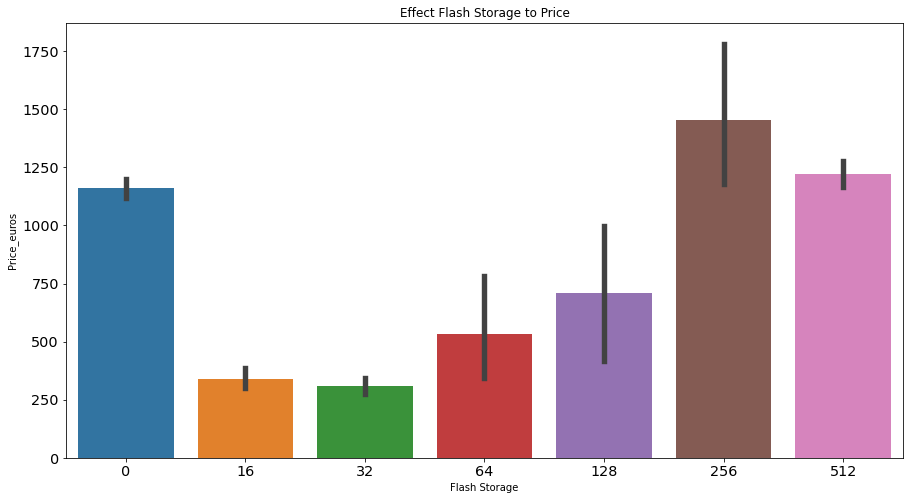

In [ ]:
sns.barplot(laptop['Flash Storage'],laptop.Price_euros)
plt.title('Effect Flash Storage to Price')
plt.show()

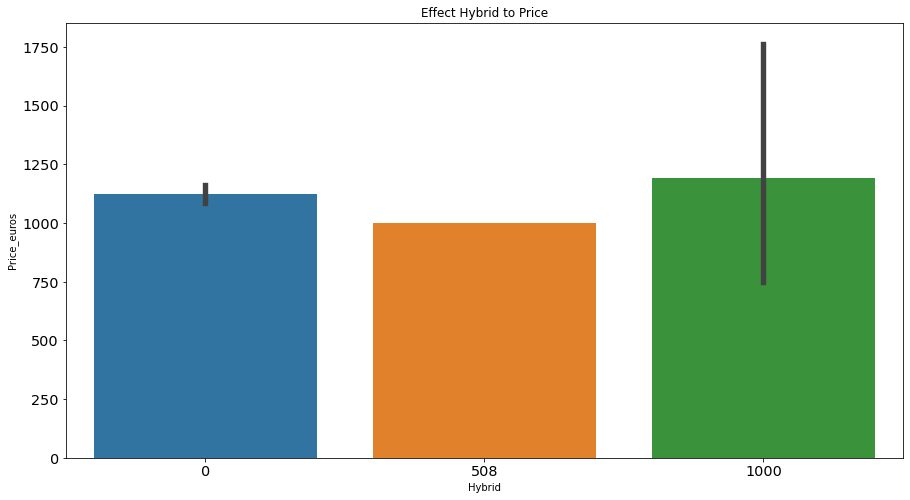

In [ ]:
sns.barplot(laptop.Hybrid,laptop.Price_euros)
plt.title('Effect Hybrid to Price')
plt.show()

From the results of the analysis effect of HDD, SDD, Flash Storage and Hybrid storage to price, the four  do not have a significant impact on prices, although it looks like an increase in the price of type storage capacities such as HDD, SDD, Flash Storage and Hybrid, but from barplot  when the value 0 the price of the laptop still tends to be higher

### Extract GPU Brand

In [ ]:
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,HDD,SDD,Flash Storage,Hybrid
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440,900,127.68,Intel Core i5,0,0,128,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920,1080,141.21,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,2880,1800,220.53,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,2560,1600,226.98,Intel Core i5,0,256,0,0


In [ ]:
#get GPU brand from column GPU
laptop['Gpu_brand'] = laptop['Gpu'].apply(lambda x :x.split()[0])
laptop['Gpu_brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu_brand, Length: 1303, dtype: object

In [ ]:
laptop['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

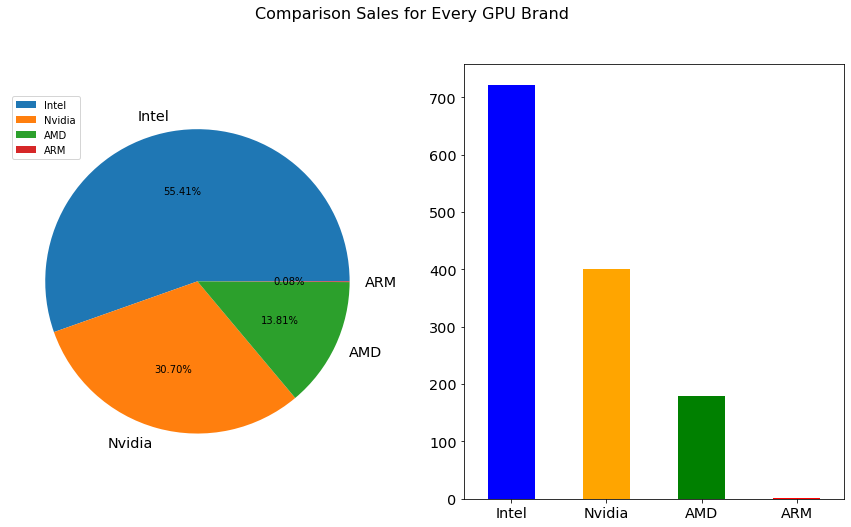

In [ ]:
#check what gpu brand is the most selling
#setting size graph
plt.rcParams['figure.figsize'] = (15,8)

#setting title
fig = plt.figure()
fig.suptitle("Comparison Sales for Every GPU Brand", fontsize=16)

#create a pie chart to see the percentage which sold for each GPU brand
plt.subplot(121)
plt.pie(laptop['Gpu_brand'].value_counts(),labels=['Intel','Nvidia','AMD','ARM'],autopct='%.2f%%')
plt.legend(loc='upper left')

#make barplot to see how many GPU brand selling
plt.subplot(122)
laptop['Gpu_brand'].value_counts().plot(kind='bar',color=['b','orange','g','r'])
plt.xticks(rotation=0)
plt.show()

Intel sold very much with the percentage sold as much as 55.41% followed by Nvidia with a sales percentage of 30.70% while the smallest sales level was ARM with a sales rate of 0.08%

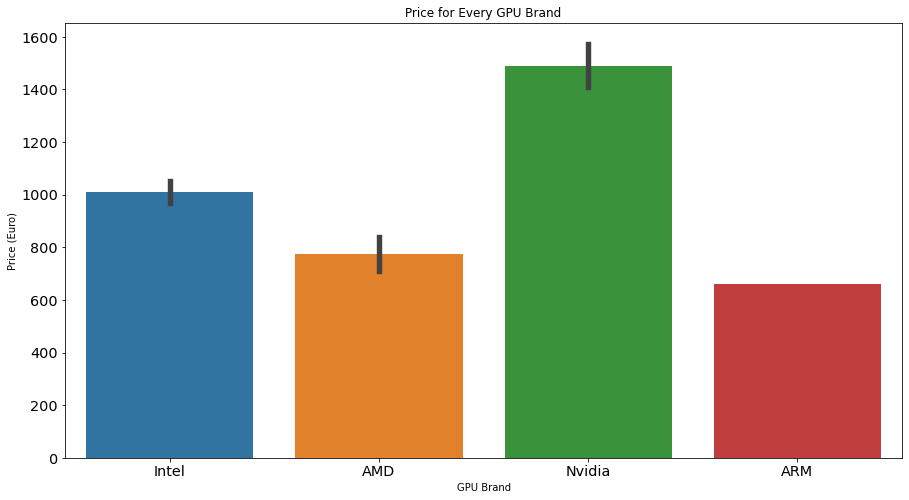

In [ ]:
#price for every GPU Brand
sns.barplot(x=laptop['Gpu_brand'],y=laptop['Price_euros'])
plt.title('Price for Every GPU Brand')
plt.xlabel('GPU Brand')
plt.ylabel('Price (Euro)')
plt.show()

The graph shows that intel has the second-highest price level, but with the highest level of sales, this is most likely because intel was first known by the public as a GPU in computer and laptop equipment, if analyzing the market, most of the people who use laptops for needs such as work. office, as well as work like tasks, for the market that uses laptops for performance-heavy purposes like editing videos, songs, playing games, and so on, Nvidia still dominates the market compared to AMD which is also known to be used for purposes like gaming, edit videos and so on. , while for ARM may not be widely known by consumers so that sales are very few.

In [ ]:
#remove ARM because it just only 1 have sold
laptop = laptop[laptop['Gpu_brand']!='ARM']
laptop['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

### Extract Operating System

looking at market habits, ```windows 7 and 10``` are the default installations, where when buying a laptop the seller will offer you what windows you want to use, is it windows 7 or 10, so in the OpSys column there will be a grouping of operating systems like ```Windows 7, 10 and 10 S``` will be grouped together under the name ```windows```, as well as other operating systems.

In [ ]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
#make function to extract OpSys
def operating(opsys):
  if opsys=='Windows 10 S' or opsys=='Windows 10' or opsys=='Windows 7':
    return 'Windows'
  elif opsys=='macOS' or opsys=='Mac OS X':
    return 'Mac'
  else:
    return 'other OS/Linux/No OS'

#apply function
laptop['OpSys'] = laptop['OpSys'].apply(lambda x:operating(x))

#value counts
laptop['OpSys'].value_counts()

Windows                 1125
other OS/Linux/No OS     156
Mac                       21
Name: OpSys, dtype: int64

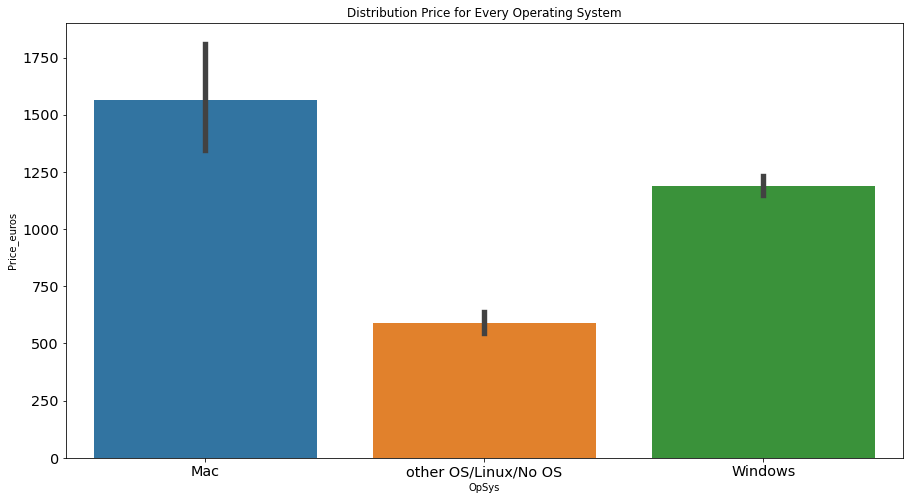

In [ ]:
#distribution price for operating system
sns.barplot(data=laptop,x=laptop['OpSys'],y=laptop['Price_euros'])
plt.title('Distribution Price for Every Operating System')
plt.show()

Mac operating system has a high price, then windows has the second high price, followed by linux and the lowest price is other operating systems

# Correlation Matriks

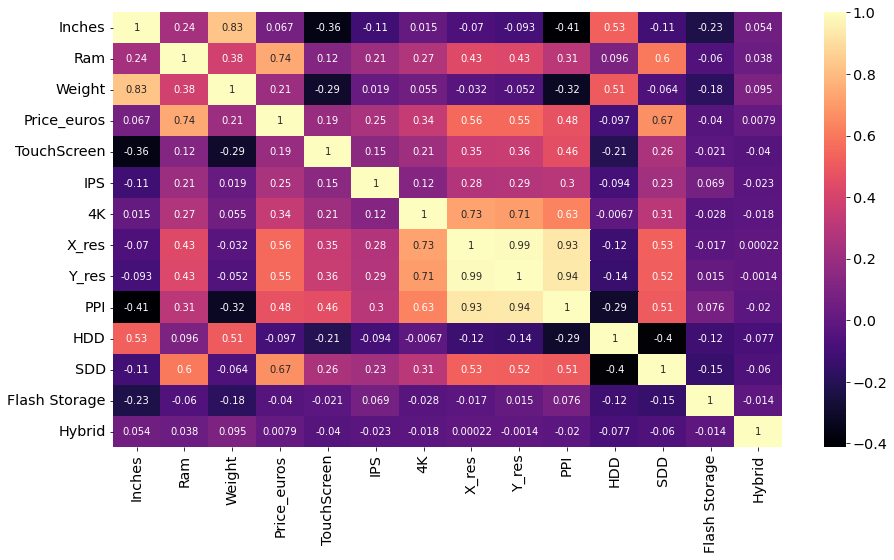

In [ ]:
#heatmap for check correlation to price
sns.heatmap(laptop.corr(),annot=True,cmap='magma')

1. PPI, X_res and y_res are strongly correlated, because PPI represents X_res and Y_res, PPI is used as a predictor.
2. The correlation between Ram and SDD is 0.6, this value is below < 0.8 so both can be used as predictors.
3. weight and inches are strongly correlated, but weight is better correlated with euro_price, so weight is chosen as a predictor.
4. Hybrid, HDD, and flash storage have very little correlation with euro_price so they are not included as predictors.

#Preprocessing

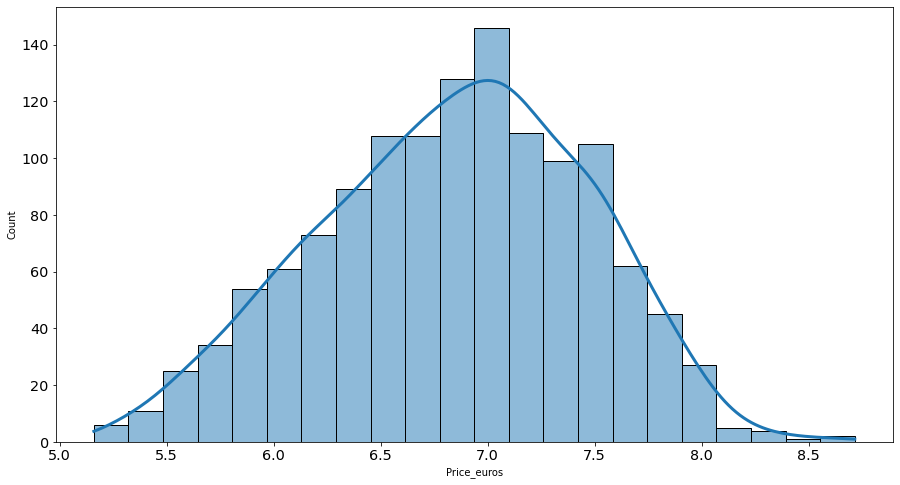

In [ ]:
#make a new variable
data = laptop.copy()

#transform price euros using np.log
data['Price_euros'] = np.log(data['Price_euros'])

#see the distributiion price after tansform
sns.histplot(data['Price_euros'], kde=True)

```Price_euros``` curve appears to follow a bell shape, so it can be assumed to have followed a normal distribution

In [ ]:
data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,HDD,SDD,Flash Storage,Hybrid,Gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,7.200194,0,1,0,2560,1600,226.98,Intel Core i5,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,6.801216,0,0,0,1440,900,127.68,Intel Core i5,0,0,128,0,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,other OS/Linux/No OS,1.86,6.354370,0,0,0,1920,1080,141.21,Intel Core i5,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512 SSD,AMD Radeon Pro 455,Mac,1.83,7.838915,0,1,0,2880,1800,220.53,Intel Core i7,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,7.497540,0,1,0,2560,1600,226.98,Intel Core i5,0,256,0,0,Intel


In [ ]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'TouchScreen', 'IPS',
       '4K', 'X_res', 'Y_res', 'PPI', 'processor', 'HDD', 'SDD',
       'Flash Storage', 'Hybrid', 'Gpu_brand'],
      dtype='object')

In [ ]:
catCols =['Company', 'Product', 'TypeName','Memory','OpSys','processor','Gpu_brand']

#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(data, columns=catCols, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (1302, 700)


In [ ]:
#Label encoding
en = LabelEncoder()
for cols in catCols:
    data[cols] = en.fit_transform(data[cols])
print('Dataframe encoded by Label encoding dimension : ', data.shape)

Dataframe encoded by Label encoding dimension :  (1302, 23)


In [ ]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,HDD,SDD,Flash Storage,Hybrid,Gpu_brand
0,1,299,4,13.3,IPS Panel Retina Display 2560x1600,8.0,7,Intel Iris Plus Graphics 640,0,1.37,7.200194,0,1,0,2560,1600,226.98,2,0,128,0,0,1
1,1,300,4,13.3,1440x900,8.0,5,Intel HD Graphics 6000,0,1.34,6.801216,0,0,0,1440,900,127.68,2,0,0,128,0,1
2,7,50,3,15.6,Full HD 1920x1080,8.0,16,Intel HD Graphics 620,2,1.86,6.354370,0,0,0,1920,1080,141.21,2,0,256,0,0,1
3,1,299,4,15.4,IPS Panel Retina Display 2880x1800,16.0,28,AMD Radeon Pro 455,0,1.83,7.838915,0,1,0,2880,1800,220.53,3,0,512,0,0,0
4,1,299,4,13.3,IPS Panel Retina Display 2560x1600,8.0,16,Intel Iris Plus Graphics 650,0,1.37,7.497540,0,1,0,2560,1600,226.98,2,0,256,0,0,1


In [ ]:
#drop unnecessary columns and make new variable X and y for model
#drop_col = ['Company','Y_res','ScreenResolution','PPI','Gpu','Inches','Hybrid','HDD','Flash Storage','Price_euros']
drop_col = ['Company','X_res', 'Y_res','ScreenResolution','Gpu','Inches','Hybrid','HDD','Flash Storage','Price_euros']

X=data.drop(drop_col, axis = 1).values
y =data['Price_euros'].values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.04963139,  1.13863245, -0.0758498 , ..., -0.44661908,
        -0.29895552, -0.26168974],
       [-0.04380294,  1.13863245, -0.0758498 , ..., -0.44661908,
        -0.9838229 , -0.26168974],
       [-1.50091645,  0.33423774, -0.0758498 , ..., -0.44661908,
         0.38591185, -0.26168974],
       ...,
       [-0.65579061,  0.33423774, -1.25620561, ...,  1.57598282,
        -0.9838229 , -0.26168974],
       [-1.78068225,  0.33423774, -0.46930174, ...,  0.56468187,
        -0.9838229 , -1.81041722],
       [ 1.5123943 ,  0.33423774, -0.86275367, ...,  1.57598282,
        -0.9838229 , -0.26168974]])

In [ ]:
X = scaler.transform(X)
X

array([[-1.79262843, -1.16303647, -1.66457918, ..., -2.9208873 ,
        -0.98542247, -2.21570331],
       [-1.79259446, -1.16303647, -1.66457918, ..., -2.9208873 ,
        -0.98908687, -2.21570331],
       [-1.80108718, -1.81008732, -1.66457918, ..., -2.9208873 ,
        -0.98175807, -2.21570331],
       ...,
       [-1.7961614 , -1.81008732, -1.89678582, ..., -0.87542806,
        -0.98908687, -2.21570331],
       [-1.80271778, -1.81008732, -1.74198139, ..., -1.89815768,
        -0.98908687, -4.61426011],
       [-1.78352423, -1.81008732, -1.8193836 , ..., -0.87542806,
        -0.98908687, -2.21570331]])

In [ ]:
# make train test 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,random_state=42)

X_train.shape,X_test.shape

((911, 13), (391, 13))

In [ ]:
y_train.shape,y_test.shape

((911,), (391,))

#Modelling

## Linear Regression

In [ ]:
#model built for linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict data test
pred = regressor.predict(X_test)

In [ ]:
#Evaluation
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The Intercept
print('Intercept: \n', regressor.intercept_)

# MSE

print("MSE: %.2f" % mean_squared_error(y_test, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(y_test, pred))

# Explained variance score: 1 is perfect prediction

print('R2 score: %.2f' % r2_score(y_test, pred))

Coefficients: 
 [ 3.11620037e+00  5.91095259e-02  1.01189543e+00 -1.12667204e-01
 -3.61519256e-02  6.67936320e-02  8.85040380e-03  1.42323531e-02
 -1.64304034e-02  8.05466090e+00 -2.28267781e-02  3.69312948e+01
  6.36839350e-02]
Intercept: 
 77.95439447284728
MSE: 0.13
RMSE: 0.37
MAE: 0.30
R2 score: 0.66


##Ridge Regression

In [ ]:
#Make Rigde Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
#predict price
pred = ridge_model.predict(X_test)

In [ ]:
#Evaluation
# The coefficients
print('Coefficients: \n', ridge_model.coef_)

# The Intercept
print('Intercept: \n', ridge_model.intercept_)

# Explained variance score: 1 is perfect prediction

print('R2 score: %.2f' % r2_score(y_test, pred))

# MSE

print("MSE: %.2f" % mean_squared_error(y_test, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(y_test, pred))

Coefficients: 
 [ 1.18945779e-01  9.63404728e-02  1.74011094e+00  3.20196750e-01
 -4.40598471e-02  6.42826825e-04  3.05168149e-02  3.13862355e-02
  1.18262378e-03  1.37621235e+00 -3.29787744e-02  4.88703115e-01
  7.74980918e-02]
Intercept: 
 15.743156129461092
R2 score: 0.58
MSE: 0.16
RMSE: 0.41
MAE: 0.34


##Lasso Regression

In [ ]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
#predict price 
pred = lasso_model.predict(X_test)

In [ ]:
#metode evaluation
# The coefficients
print('Coefficients: \n', lasso_model.coef_)

# The Intercept
print('Intercept: \n', lasso_model.intercept_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

# MSE
print("MSE: %.2f" % mean_squared_error(y_test, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=True))

# The MAE
print("MAE: %.2f" % mean_absolute_error(y_test, pred))

# The R2
print('R2 score: %.2f' % r2_score(y_test, pred))

#accuration test
print("akurasi data train:", lasso_model.score(X_train, y_train))
print("akurasi data test:", lasso_model.score(X_test, y_test))

Coefficients: 
 [ 0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]
Intercept: 
 6.838293343999568
Variance score: -0.00
MSE: 0.39
RMSE: 0.39
MAE: 0.50
R2 score: -0.00
akurasi data train: 0.0
akurasi data test: -3.70948410968186e-05


##Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=250)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=250, n_estimators=1000)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
print("MSE: %.2f" % mean_squared_error(y_test,y_pred_rf))
print("RMSE using RF: {} $ ".format(np.round(np.sqrt(mse_rf)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))

MSE: 0.05
RMSE using RF: 317.0 $ 
R2 using Random Forest: 88.02 %


In [ ]:
#Check feature important from Random Forest Model
data_feature = data.drop(drop_col,axis=1)
feature_name_list=data_feature.columns
rf.feature_names = feature_name_list
rf_df= pd.DataFrame({'feature': rf.feature_names,'importance':rf.feature_importances_})
rf_df

,feature,importance
0,Product,0.062486
1,TypeName,0.028715
2,Ram,0.611587
3,Memory,0.024812
4,OpSys,0.014531
5,Weight,0.079155
6,TouchScreen,0.006098
7,IPS,0.004847
8,4K,0.000530
9,PPI,0.049861


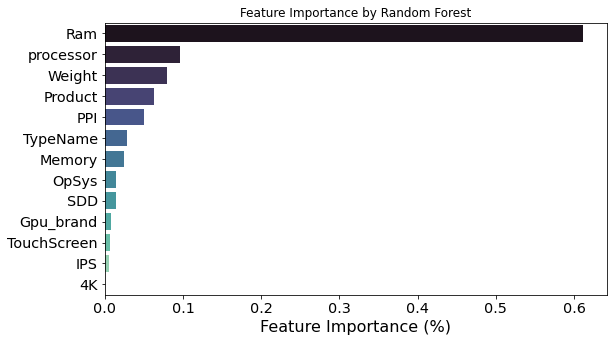

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=rf_df.sort_values('importance', ascending=False), palette='mako')
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)', fontsize=16)
plt.xticks(rotation=0)
plt.ylabel('')
plt.show()

## XGBOOST

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.24, max_depth=2)

In [ ]:
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=0)

[12:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.24, max_depth=2, n_estimators=1000)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))
print("MSE: %.2f" % mean_squared_error(y_test,y_pred_xgb))
print("RMSE with XGBoost : {:.2f} $".format(np.round(np.sqrt(mse_xgb),2)))
print("R2 with XGBoost: {:.2f} % ".format(np.round(r2_score(y_test, y_pred_xgb),4)*100))

MSE: 0.04
RMSE with XGBoost : 286.01 $
R2 with XGBoost: 90.58 % 


In [ ]:
print("RMSE with XGBoost : {:.2f} $".format(np.sqrt(mse_xgb)))
print("R2 with XGBoost: {:.2f} % ".format(r2_score(y_test, y_pred_xgb)*100))

RMSE with XGBoost : 286.01 $
R2 with XGBoost: 90.58 % 


In [ ]:
xgb.feature_names = feature_name_list
feat_df= pd.DataFrame({'feature': xgb.feature_names,'importance':xgb.feature_importances_})

In [ ]:
sorted_df=feat_df.sort_values('importance', ascending=False)

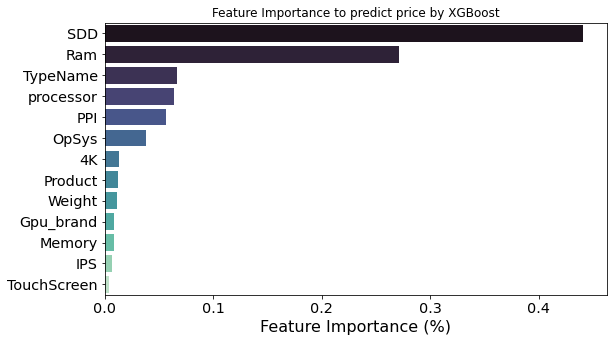

In [ ]:
#Check feature important from XGBoost
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=sorted_df, palette='mako')
plt.title('Feature Importance to predict price by XGBoost')
plt.xlabel('Feature Importance (%)',fontsize=16)
plt.ylabel('')
plt.show()

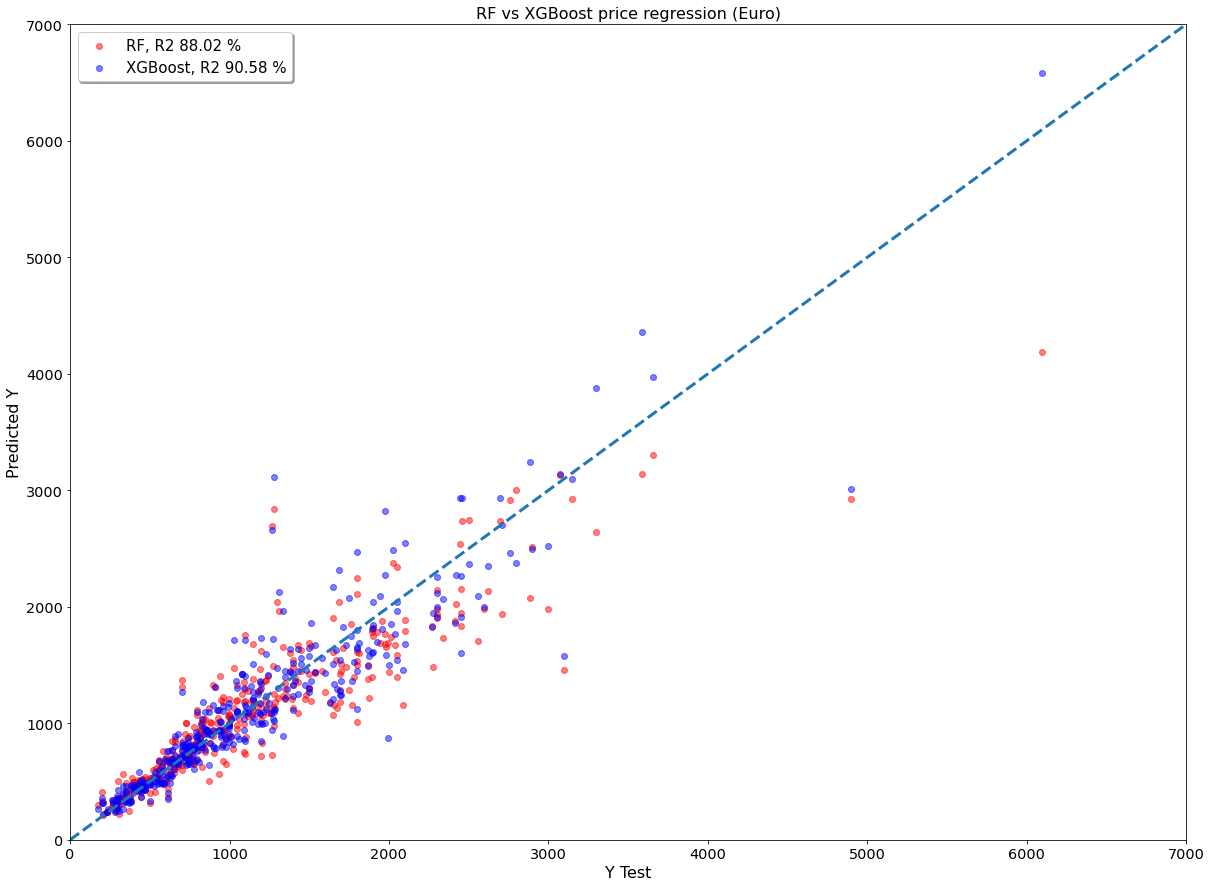

In [ ]:
#Regression graph between Random Forest and XGBoost
plt.figure(figsize = (20,15))
plt.scatter(np.exp(y_test), np.exp(y_pred_rf), alpha=0.5, color='red',label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.5, color='blue',label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test', fontsize=16)
plt.ylabel('Predicted Y',fontsize=16)
plt.title('RF vs XGBoost price regression (Euro)',fontsize=16)
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

from the results of each machine learning, it is found that the XGBoost model is the best machine learning to predict the price of a laptop with an R2 score of 90.58% with the most important features being SSD, Ram, PPI and Processor

# Prediction on the whole Dataset

In [ ]:
predicted = []
testtrain = np.array(X)
for i in range(len(testtrain)):
    predicted.append(xgb.predict([testtrain[i]]))
    
predicted

[array([7.274344], dtype=float32),
 array([6.917303], dtype=float32),
 array([6.289094], dtype=float32),
 array([7.8807344], dtype=float32),
 array([7.3897724], dtype=float32),
 array([5.9091887], dtype=float32),
 array([7.565735], dtype=float32),
 array([7.007673], dtype=float32),
 array([7.3144255], dtype=float32),
 array([6.804343], dtype=float32),
 array([5.9939985], dtype=float32),
 array([5.9122124], dtype=float32),
 array([7.7555604], dtype=float32),
 array([6.286029], dtype=float32),
 array([7.2925544], dtype=float32),
 array([7.3897724], dtype=float32),
 array([6.7953997], dtype=float32),
 array([7.8807344], dtype=float32),
 array([6.231922], dtype=float32),
 array([6.9038777], dtype=float32),
 array([5.3504443], dtype=float32),
 array([6.96448], dtype=float32),
 array([5.644347], dtype=float32),
 array([6.89248], dtype=float32),
 array([6.501512], dtype=float32),
 array([6.1199775], dtype=float32),
 array([6.9064207], dtype=float32),
 array([6.6849937], dtype=float32),
 array

In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
laptop['Predicted Price'] = np.array(ans)
laptop

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,4K,X_res,Y_res,PPI,processor,HDD,SDD,Flash Storage,Hybrid,Gpu_brand,Predicted Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,0,2560,1600,226.98,Intel Core i5,0,128,0,0,Intel,1442.804443
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8.0,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,0,1440,900,127.68,Intel Core i5,0,0,128,0,Intel,1009.593506
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8.0,256 SSD,Intel HD Graphics 620,other OS/Linux/No OS,1.86,575.00,0,0,0,1920,1080,141.21,Intel Core i5,0,256,0,0,Intel,538.665039
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,512 SSD,AMD Radeon Pro 455,Mac,1.83,2537.45,0,1,0,2880,1800,220.53,Intel Core i7,0,512,0,0,AMD,2645.814941
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,1803.60,0,1,0,2560,1600,226.98,Intel Core i5,0,256,0,0,Intel,1619.337524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4.0,128 SSD,Intel HD Graphics 520,Windows,1.80,638.00,1,1,0,1920,1080,157.35,Intel Core i7,0,128,0,0,Intel,684.896912
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16.0,512 SSD,Intel HD Graphics 520,Windows,1.30,1499.00,1,1,0,3200,1800,276.05,Intel Core i7,0,512,0,0,Intel,1513.583130
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2.0,64 Flash Storage,Intel HD Graphics,Windows,1.50,229.00,0,0,0,1366,768,111.94,Other Intel Processor,0,0,64,0,Intel,240.177353
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6.0,1000 HDD,AMD Radeon R5 M330,Windows,2.19,764.00,0,0,0,1366,768,100.45,Intel Core i7,1000,0,0,0,AMD,771.350769


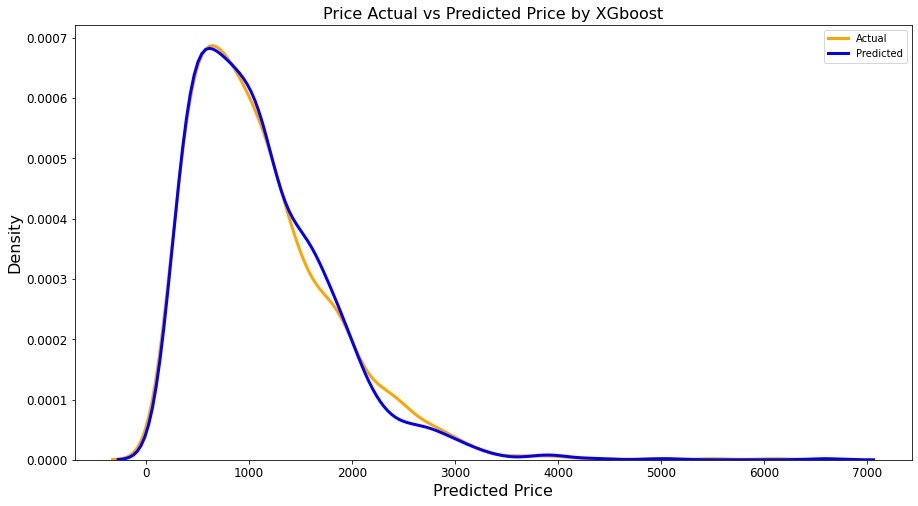

In [ ]:
sns.distplot(laptop['Price_euros'],hist=False,color='orange',label='Actual')
sns.distplot(laptop['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.title('Price Actual vs Predicted Price by XGboost',fontsize=16)
plt.xlabel('Predicted Price',fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Density',fontsize=16)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.show()

#Recomendation

1.For the market target of the middle-class economy, selling laptops with the HP, Dell, Acer, Lenovo, and Asus brands. This brand is very popular in the middle-class market.

2.the target market for gaming, selling MSI brand laptops in terms of prices for gaming laptops can be categorized as cheap so that gaming fans will prefer MSI laptops

3.The market target of the upper-class economy, selling laptops with the Apple brand because this brand is very famous in that group, in terms of the operating system it is very good in terms of computing and also for heavy work so that the upper-class market will be more interested in buying Apple brand laptops.

4.Increase sales of notebooks, from statistical data, notebooks are the best-selling among other types of laptops.

5.Standard RAM sold is at least 8GB, for windows you should install Windows 10 to increase sales attractiveness.

6.Offer the sale of laptops that have SSD, because from statistics SSD is the most important factor and the most sold in the market.

7.Laptops with Intel GPUs because from statistics, 55% of the market buys laptops with Intel GPU systems. So increase the stock of laptops with intel gpu.